# Learn HMTNet "Hierarchical Multi-task Network" architecture from scratch with Pytorch

This is my first simplified model (based on HMTNet architecture idea) that I modified in Pytorch.

The link of the paper is : https://ieeexplore.ieee.org/abstract/document/8803614


# First example

In [1]:
import torch
import torch.nn as nn
from torchsummary import summary

In [2]:
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 1.10.0


In [3]:
class HMTNet_1(nn.Module):
    def __init__(self):
        super(HMTNet_1,self).__init__()
        
        self.features = nn.Sequential(
                                      nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))        
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                                     )
        
        
        self.avgpool = nn.Sequential(
                                    nn.AdaptiveAvgPool2d((1,1)),     #nn.Flatten()
                                 )
            
        self.intermediate = nn.Sequential(
                                          nn.Linear(64,64)
                                          ,nn.ReLU()
                                          ,nn.Dropout()
                                          ,nn.Linear(64,32)
                                          ,nn.ReLU()
                                          ,nn.Dropout(0.4)
                                          ,nn.Linear(32,16)
                                          ,nn.ReLU()
                                          )
        
        self.output_classifier_1 = nn.Sequential(
                                                nn.Linear(16,1)
                                                ,nn.Sigmoid()
                                                )
        
        self.output_classifier_2 = nn.Sequential(
                                                nn.Linear(16,1)
                                                ,nn.Sigmoid()
                                                )
        
    def forward(self,x):
        
        x = self.features(x)
        
        x = self.avgpool(x)
        
        # https://pytorch.org/docs/stable/generated/torch.squeeze.html
        x = x.squeeze()        
        
        x = self.intermediate(x)
        
        output_classifier_1 = self.output_classifier_1(x)
        output_classifier_2 = self.output_classifier_2(x)
        
        return output_classifier_1, output_classifier_2

In [4]:
dev=torch.device("cuda") 

model_1 = HMTNet_1().to(dev)
print(summary(model_1,(3,227,227)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 227, 227]             896
              ReLU-2         [-1, 32, 227, 227]               0
            Conv2d-3         [-1, 32, 227, 227]           9,248
              ReLU-4         [-1, 32, 227, 227]               0
         MaxPool2d-5         [-1, 32, 113, 113]               0
            Conv2d-6         [-1, 32, 113, 113]           9,248
              ReLU-7         [-1, 32, 113, 113]               0
            Conv2d-8         [-1, 64, 113, 113]          18,496
              ReLU-9         [-1, 64, 113, 113]               0
           Conv2d-10         [-1, 64, 113, 113]          36,928
             ReLU-11         [-1, 64, 113, 113]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,928
             ReLU-14           [-1, 64,

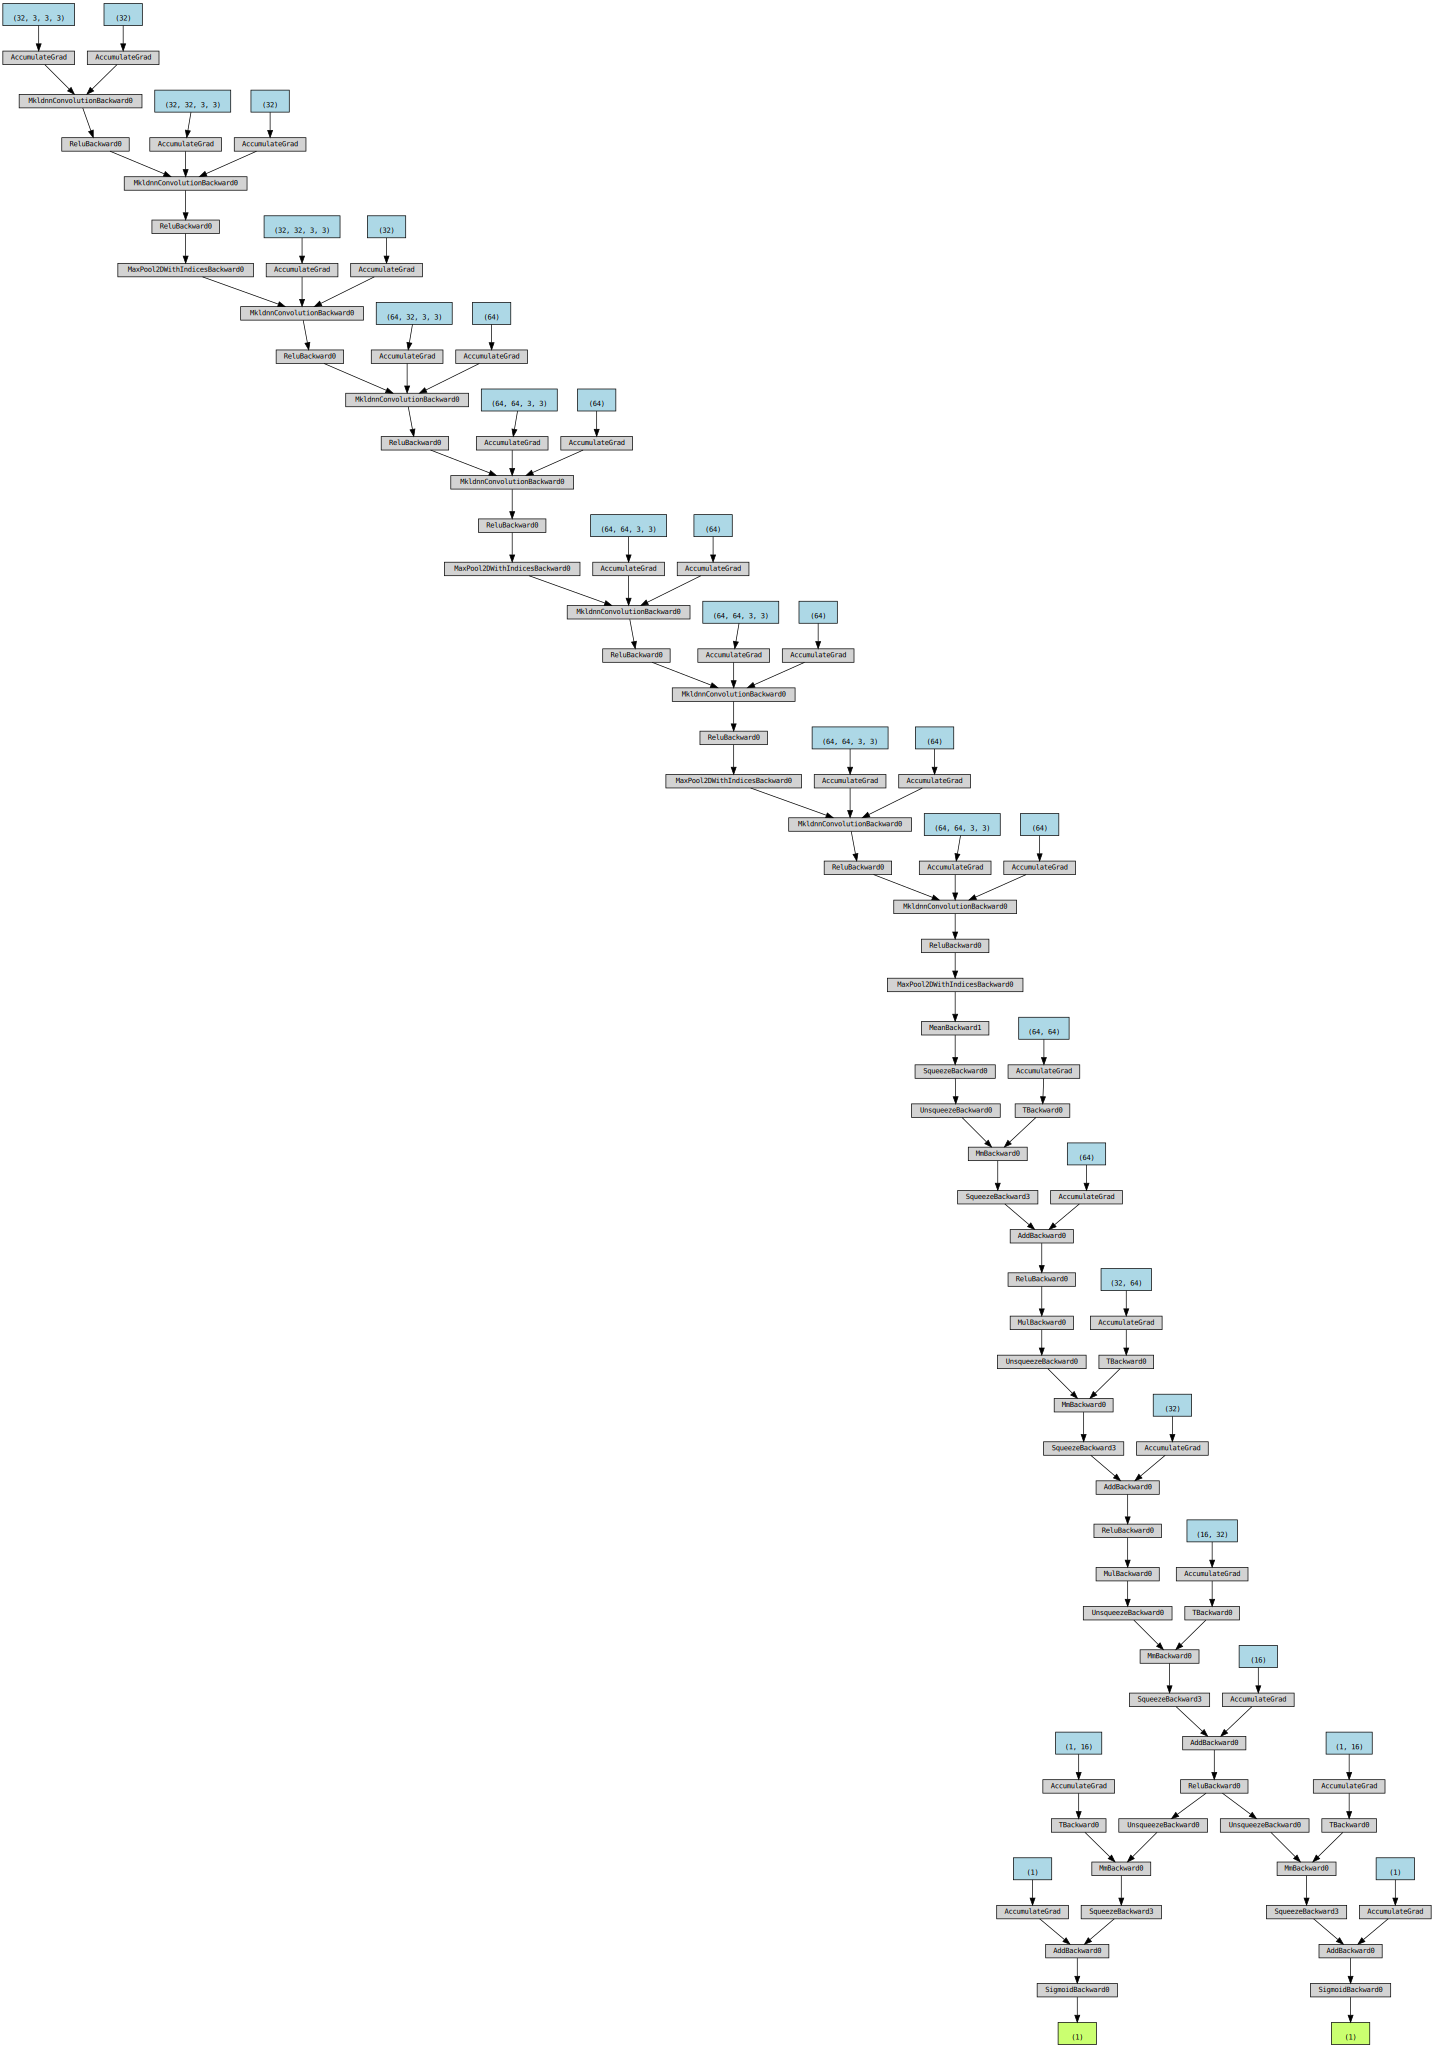

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 227, 227)

model_1_cpu = HMTNet_1()
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

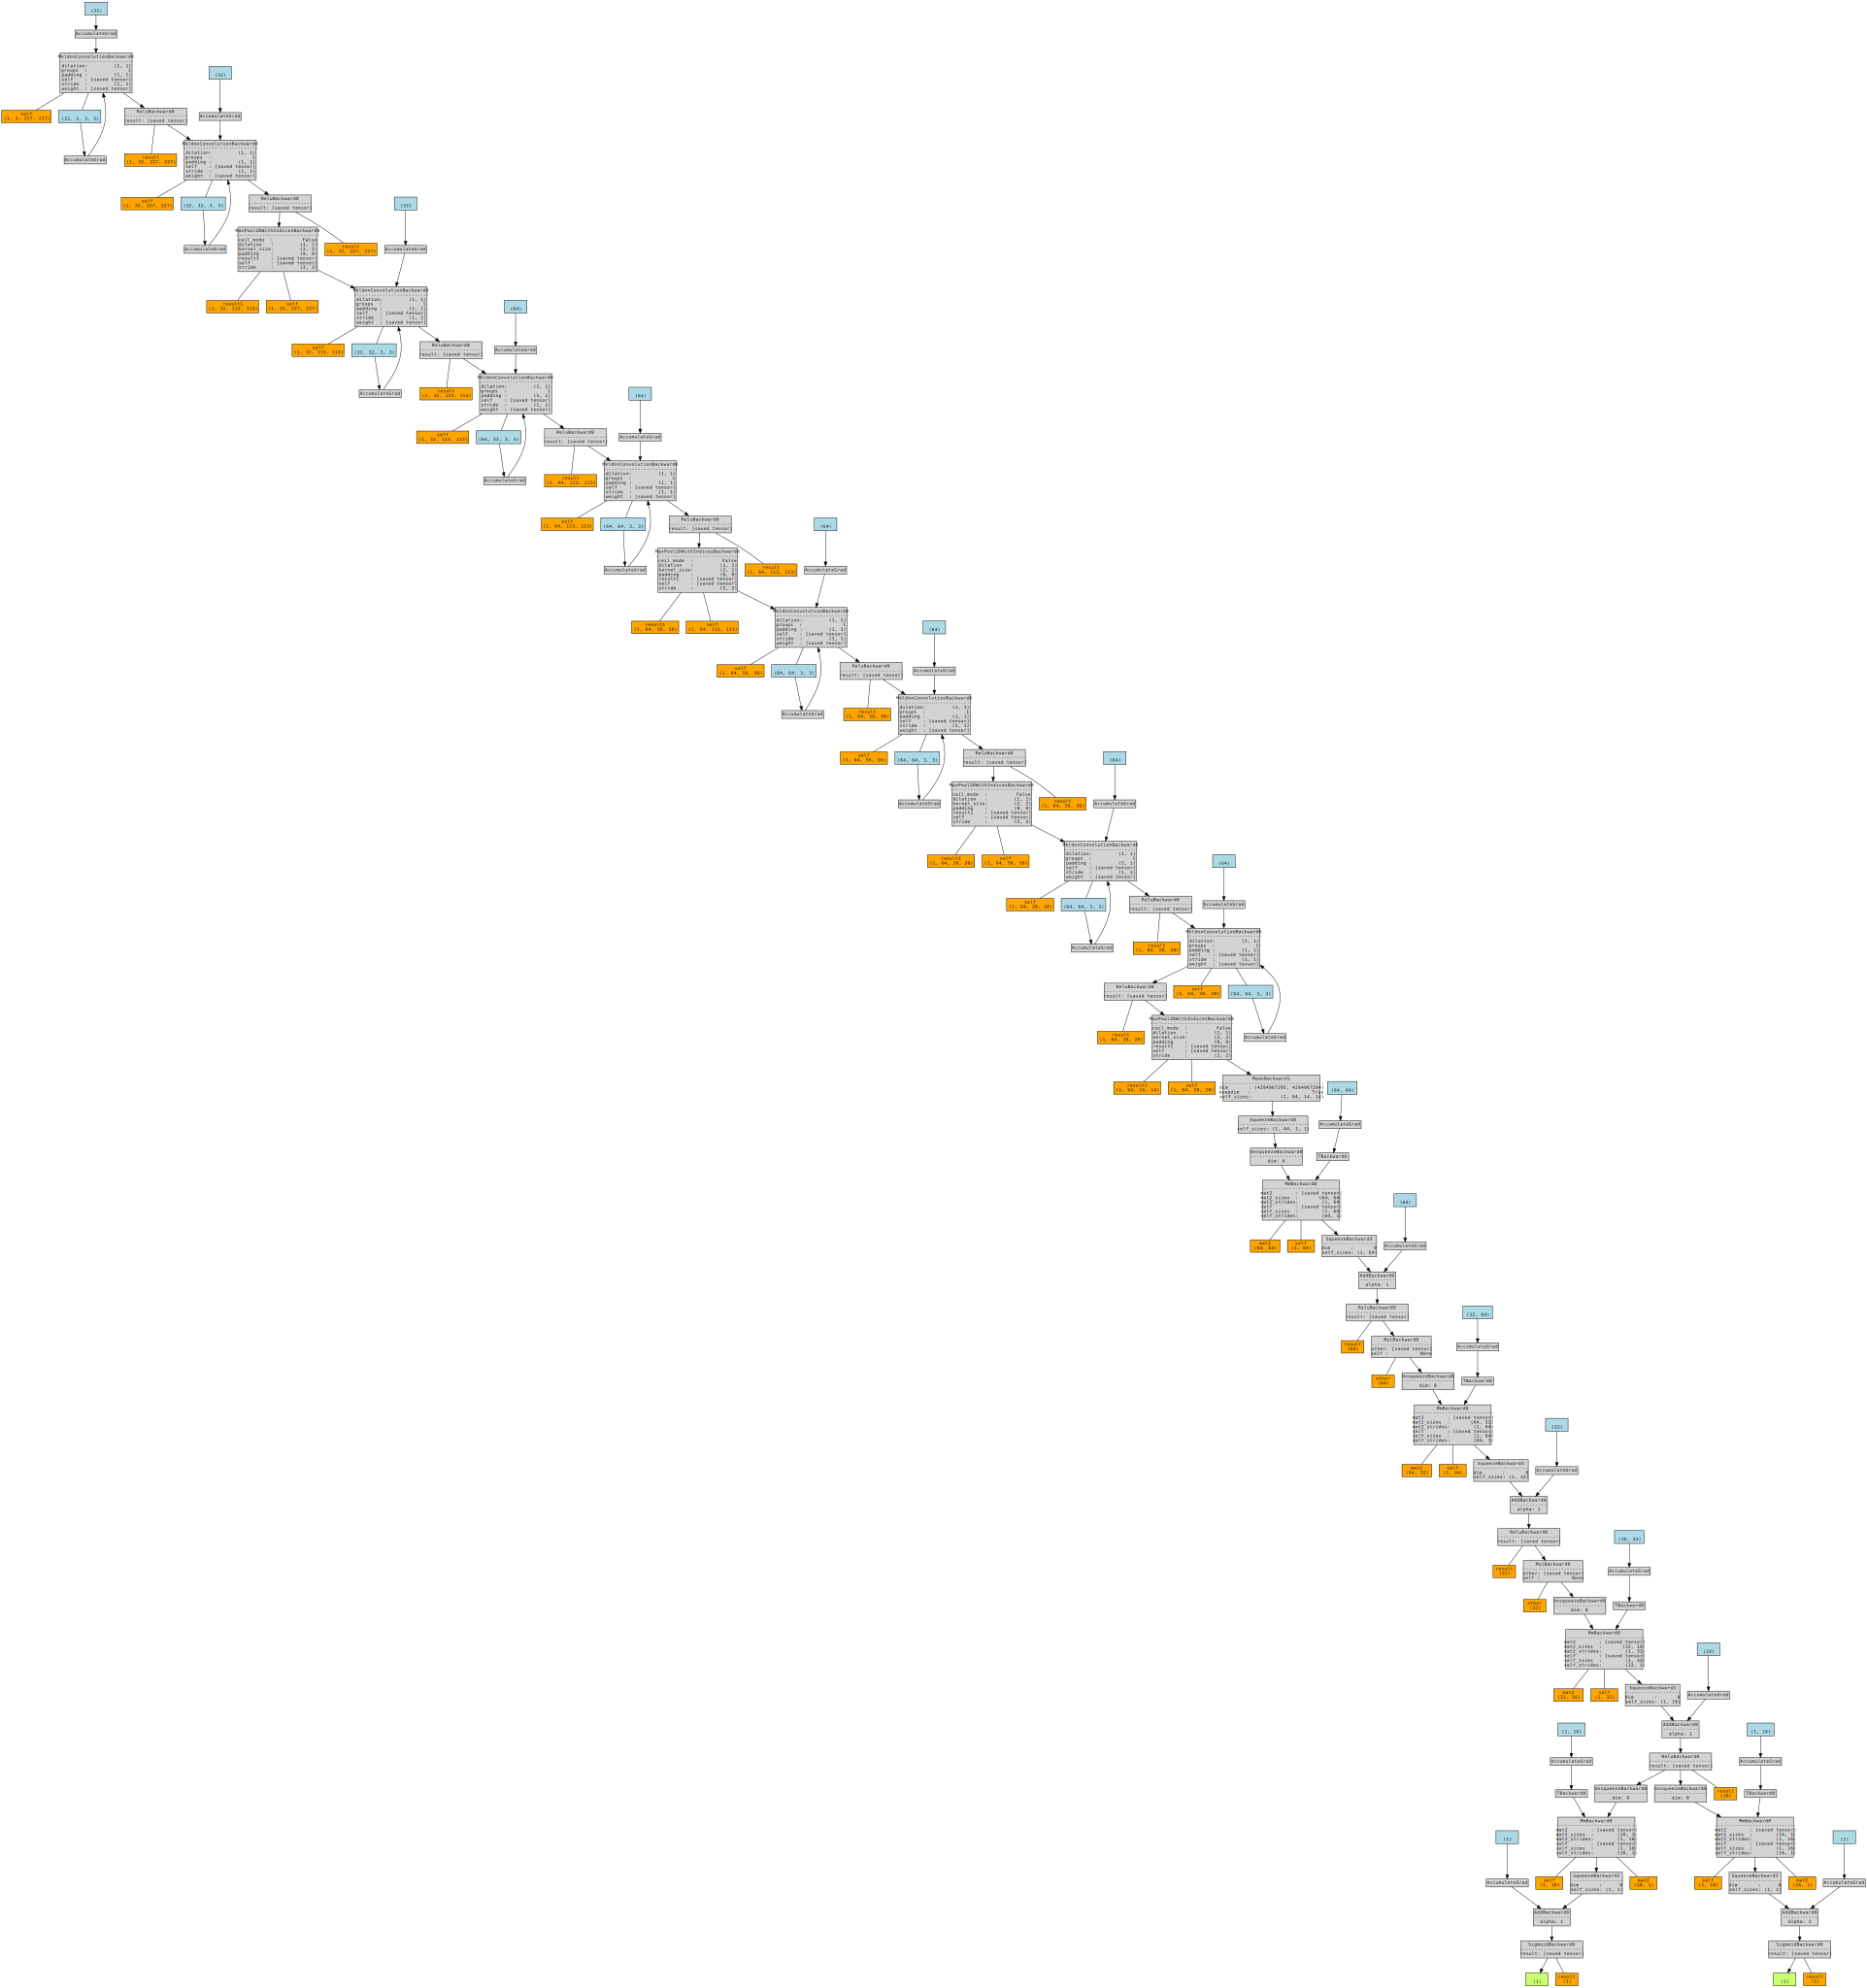

In [6]:
make_dot(model_1_cpu_out, params = None, show_attrs = True, show_saved = True)

# Second example

In [7]:
class output_classifier_1(nn.Module):

    def __init__(self, output_num=5):
        super(output_classifier_1, self).__init__()

        self.out1 = nn.Sequential(
                                 nn.Linear(16,1)
                                 ,nn.Sigmoid()
                                 )

    def forward(self, x):
        x = self.out1(x)
        
        return x

In [8]:
class output_classifier_2(nn.Module):

    def __init__(self, output_num=5):
        super(output_classifier_2, self).__init__()

        self.out2 = nn.Sequential(
                                 nn.Linear(16,1)
                                 ,nn.Sigmoid()
                                 )

    def forward(self, x):
        x = self.out2(x)
        
        return x

In [9]:
class HMTNet_2(nn.Module):
    def __init__(self):
        super(HMTNet_2,self).__init__()
        
        self.features = nn.Sequential(
                                      nn.Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))        
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
            
                                      ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                                      ,nn.ReLU(inplace=True)
                                      ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
                                     )
        
        
        self.avgpool = nn.Sequential(
                                    nn.AdaptiveAvgPool2d((1,1)),     #nn.Flatten()
                                 )
            
        self.intermediate = nn.Sequential(
                                          nn.Linear(64,64)
                                          ,nn.ReLU()
                                          ,nn.Dropout()
                                          ,nn.Linear(64,32)
                                          ,nn.ReLU()
                                          ,nn.Dropout(0.4)
                                          ,nn.Linear(32,16)
                                          ,nn.ReLU()
                                          )
        
        self.out_classifier_1 = output_classifier_1()
        
        self.out_classifier_2 = output_classifier_2()
        
    def forward(self,x):
        
        x = self.features(x)
        
        x = self.avgpool(x)
        
        # https://pytorch.org/docs/stable/generated/torch.squeeze.html
        x = x.squeeze()        
        
        x = self.intermediate(x)
        
        o_classifier_1 = self.out_classifier_1(x)
        o_classifier_2 = self.out_classifier_2(x)
        
        return o_classifier_1, o_classifier_2

In [10]:
dev=torch.device("cuda") 

model_2 = HMTNet_2().to(dev)
print(summary(model_2,(3,227,227)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 227, 227]             896
              ReLU-2         [-1, 32, 227, 227]               0
            Conv2d-3         [-1, 32, 227, 227]           9,248
              ReLU-4         [-1, 32, 227, 227]               0
         MaxPool2d-5         [-1, 32, 113, 113]               0
            Conv2d-6         [-1, 32, 113, 113]           9,248
              ReLU-7         [-1, 32, 113, 113]               0
            Conv2d-8         [-1, 64, 113, 113]          18,496
              ReLU-9         [-1, 64, 113, 113]               0
           Conv2d-10         [-1, 64, 113, 113]          36,928
             ReLU-11         [-1, 64, 113, 113]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,928
             ReLU-14           [-1, 64,

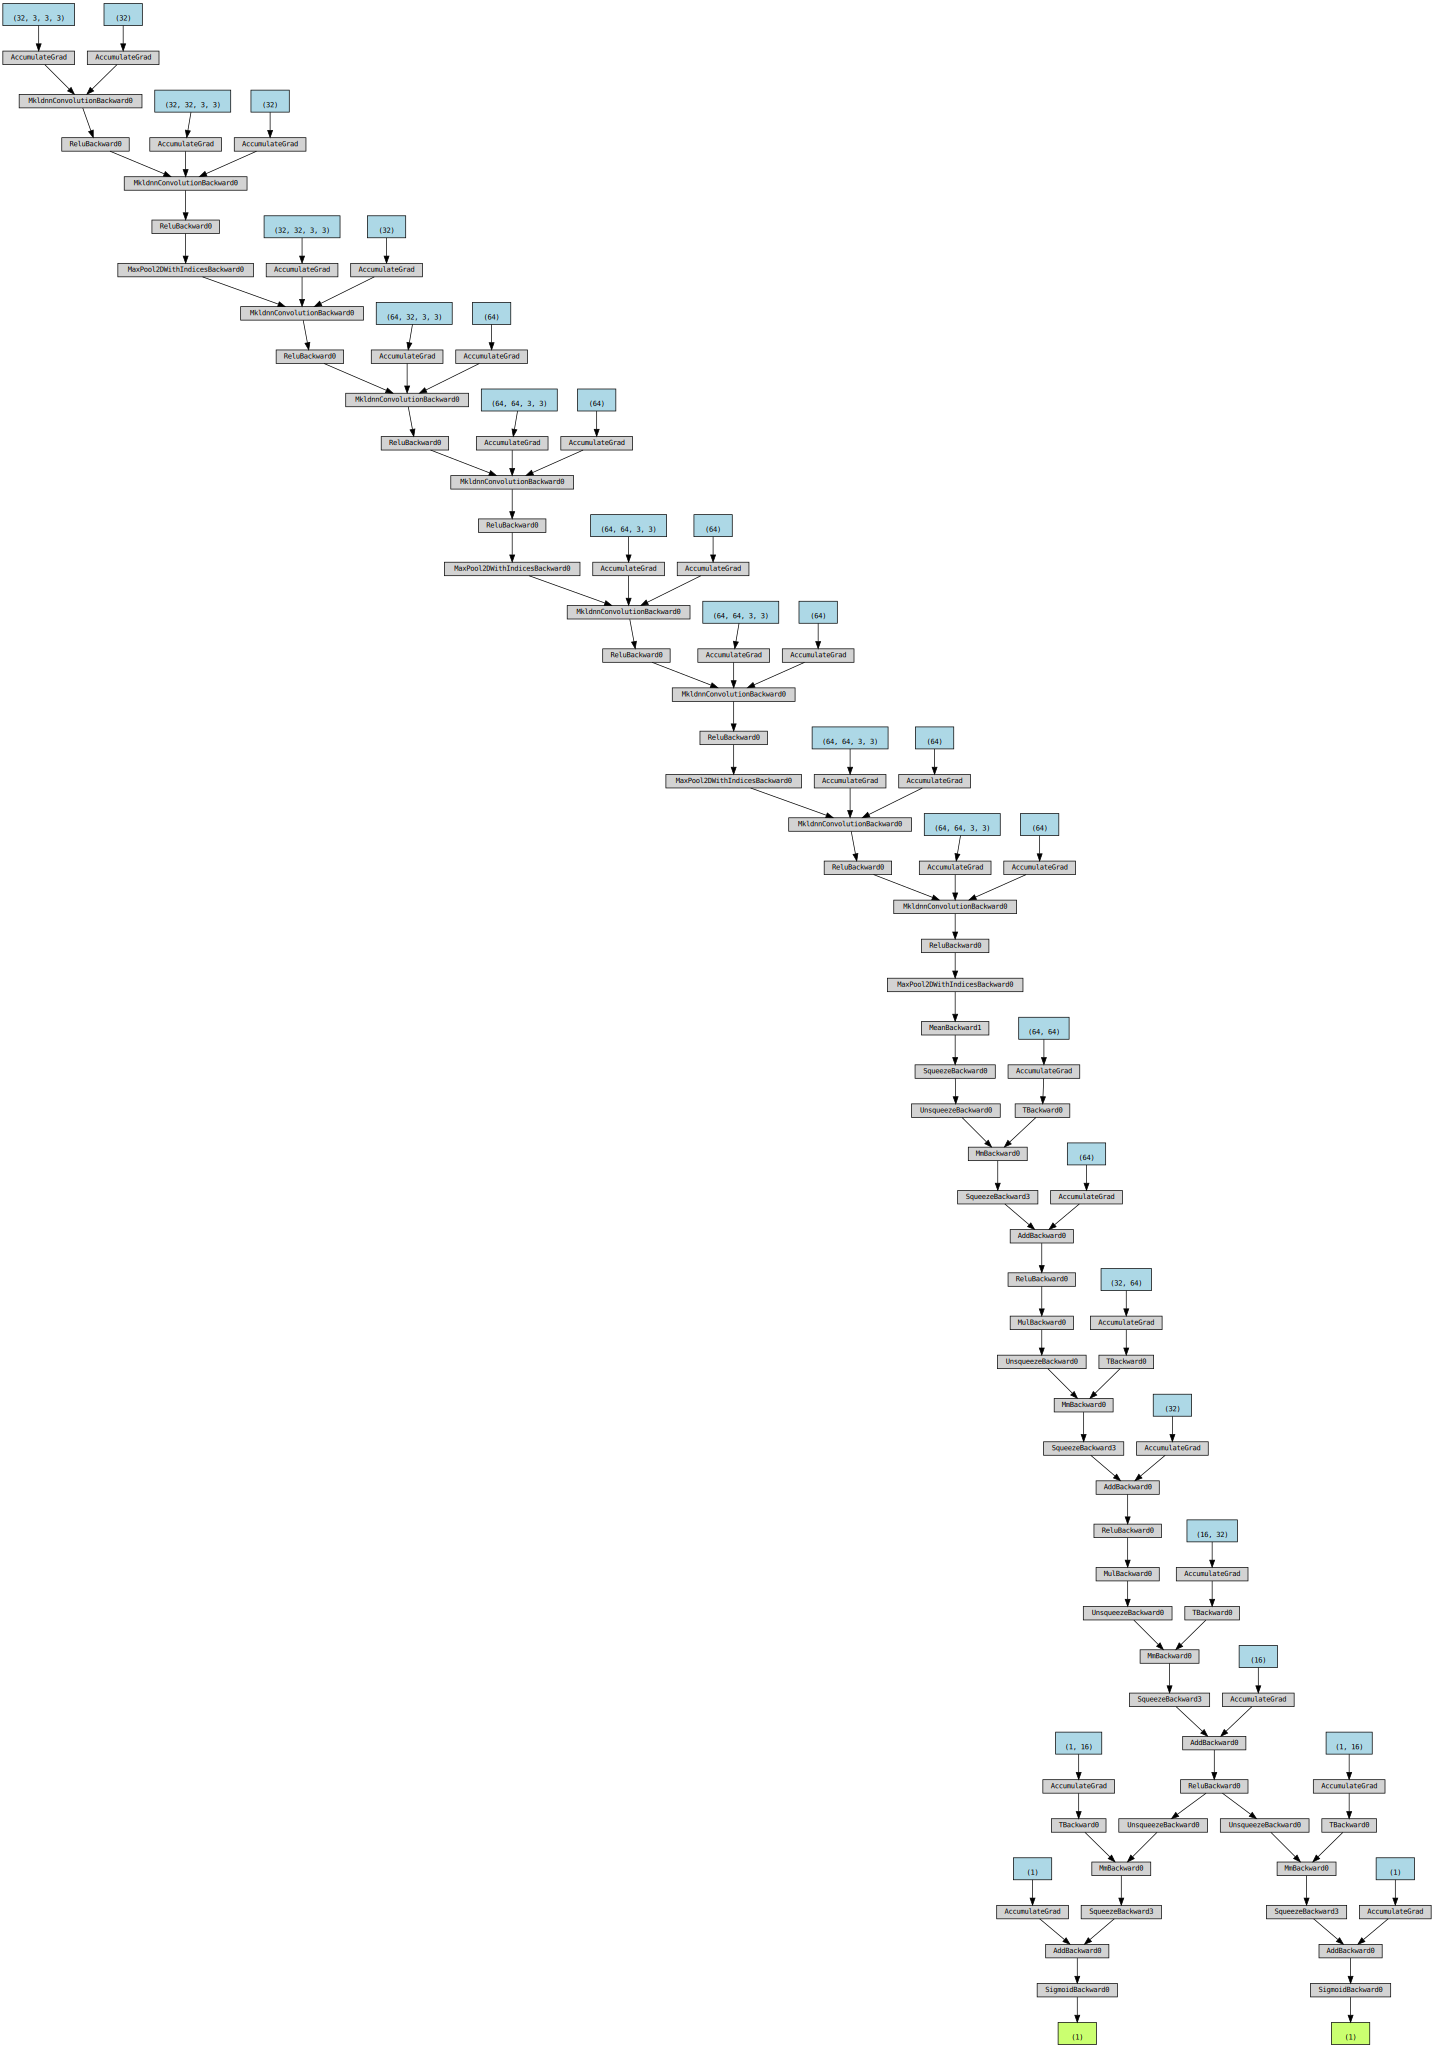

In [11]:
from torchviz import make_dot

x = torch.randn(1, 3, 227, 227)

model_2_cpu = HMTNet_2()
model_2_cpu_out = model_2_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_2_cpu_out, params = None)

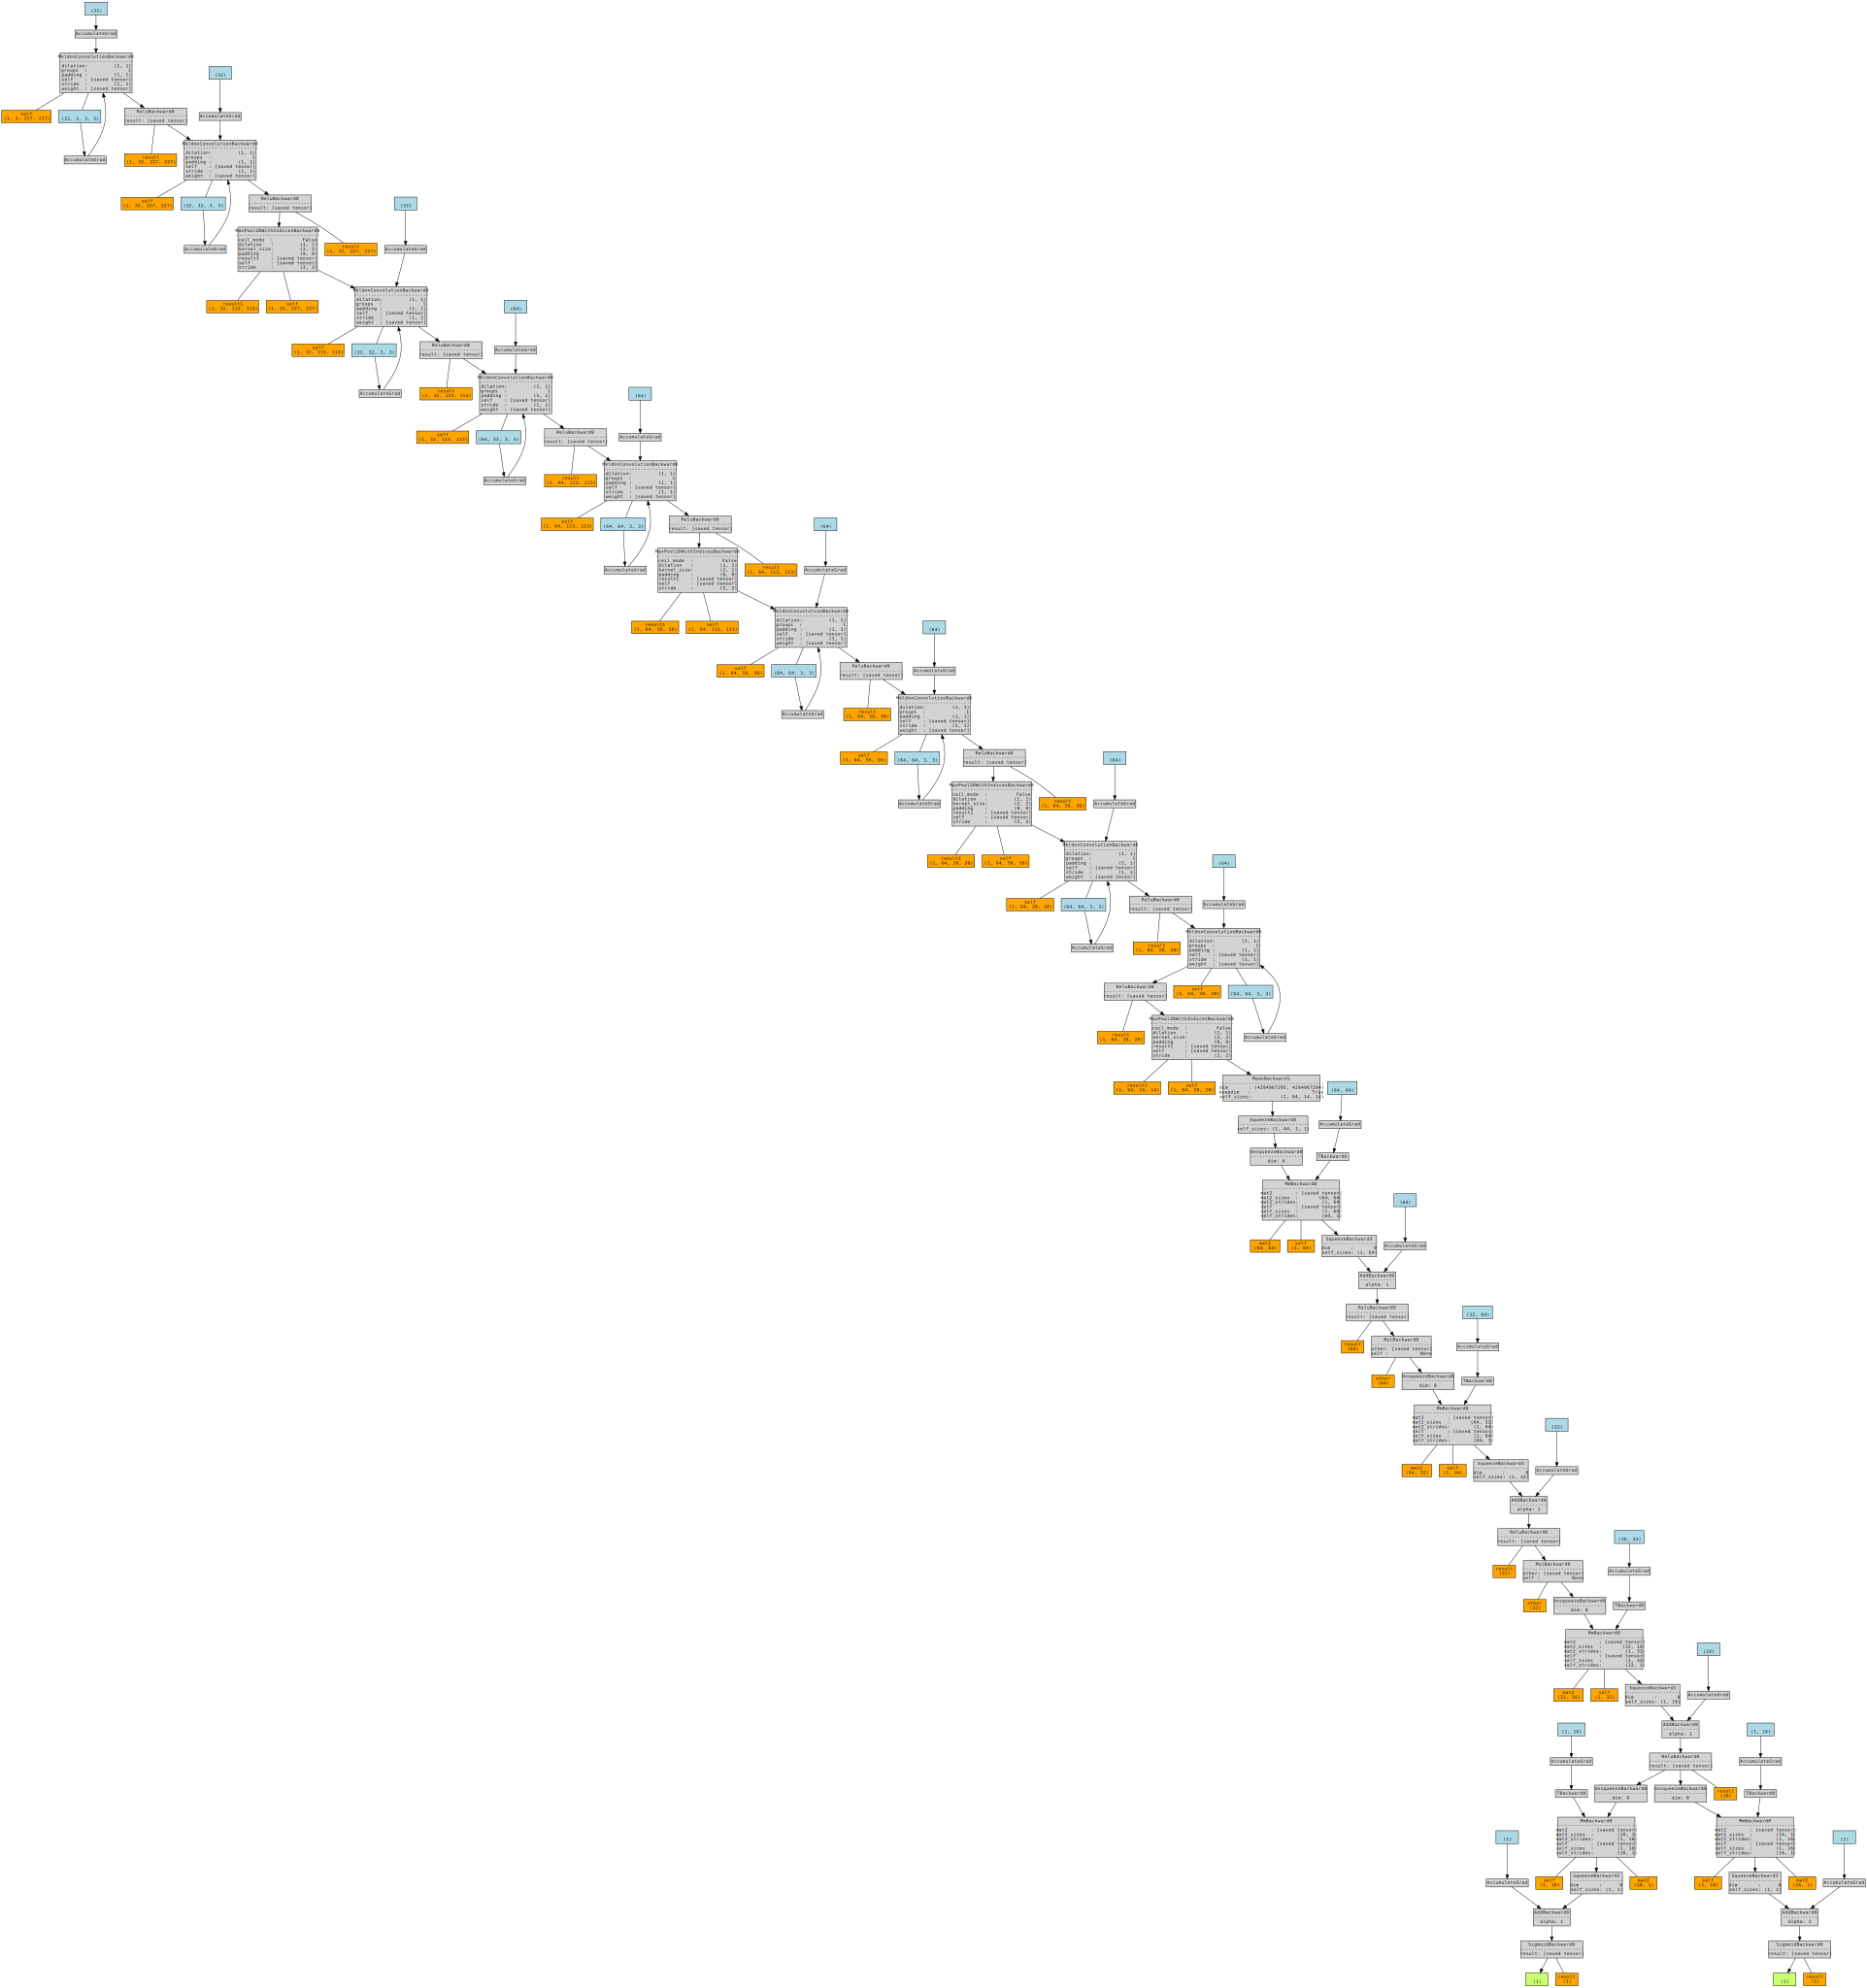

In [12]:
make_dot(model_2_cpu_out, params = None, show_attrs = True, show_saved = True)